# Optic Disc Segmentation

In [1]:
%matplotlib inline

import os
import os.path
import cv2
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi'] = 300

## Load the Images
Note to self: for consistency across platforms within my own repository structure, always run `jupyter notebook` from the root of this git repo `COMP9517`.

In [2]:
# repo_path = os.getcwd()
# data_path = os.path.join(repo_path, "assignments", "ass2", "Data_Individual_Component")

# retinal_images_path = os.path.join(data_path, "original_retinal_images")
# truth_masks_path = os.path.join(data_path, "optic_disc_segmentation_masks")

retinal_images_path = os.path.join("Data_Individual_Component", "original_retinal_images")
truth_masks_path = os.path.join("Data_Individual_Component", "optic_disc_segmentation_masks")

retinal_images_names = list(map(lambda x: os.path.join(retinal_images_path, x),os.listdir(retinal_images_path)))
truth_masks_names = list(map(lambda x: os.path.join(truth_masks_path, x), os.listdir(truth_masks_path)))

df = pd.DataFrame({"image_path": retinal_images_names, "mask_path": truth_masks_names})

In [6]:
def segment(img):
    
    def some_func(roi):
        return 0

    result = np.copy(img)
    
    # apply average filter to reduce effect of noise
    # avg_kernel = np.ones((6, 6), np.float32) / 36
    # result = cv2.filter2D(result, -1, avg_kernel)

    b = result[:,:,0]
    g = result[:,:,1]
    r = result[:,:,2]

    fig, axes = plt.subplots(1,3)
    for ax in axes:
        ax.axis('off')

    # apply maximum difference filter in 50x50 window
    avg_kernel_50 = np.ones((3,3), np.float32) / 3 ** 2
    g = cv2.filter2D(g, -1, avg_kernel_50)
    window_size = 3
    
    img = g
    img_shape = img.shape

    size = 3 # window size i.e. here is 3x3 window

    shape = (img.shape[0] - size + 1, img.shape[1] - size + 1, size, size)
    strides = 2 * img.strides
    patches = np.lib.stride_tricks.as_strided(img, shape=shape, strides=strides)
    patches = patches.reshape(-1, size, size)

    print(patches.shape)
    
    output_img = np.array([some_func(roi) for roi in patches])
    output_img.reshape(size)
    
    max_diff_loc= (0,0)

    axes[0].imshow(b)
    axes[1].imshow(g)
    axes[2].imshow(r)


    return output_img, max_diff_loc

In [7]:
def test_segmentation(image_path, truth_path):

    retinal_img = cv2.imread(image_path)
    truth_img = cv2.imread(truth_path)

    retinal_img = cv2.resize(retinal_img, None, fx=1, fy=1)

    segmented_img, max_diff_loc = segment(retinal_img)

    fig, axes = plt.subplots(1, 3)

    for ax in axes:
        ax.axis('off')

    cv2.circle(segmented_img, max_diff_loc, 10, (255,255,255), 3)
    cv2.imshow('temp', segmented_img)
    cv2.waitKey(1)
    cv2.destroyAllWindows()
    
    axes[0].imshow(retinal_img)
    axes[1].imshow(truth_img)
    axes[2].imshow(segmented_img)
    
    pass

(12197956, 3, 3)


ValueError: cannot reshape array of size 12197956 into shape (3,)

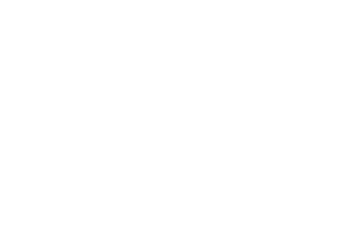

In [8]:
data = df.sample(1).iloc[0,:]
img_path = data["image_path"]
mask_path = data["mask_path"]


test_segmentation(img_path, mask_path)

In [ ]:
|